In [64]:
#Sample Datasett

import pandas as pd

sensus = {
    'Gula Darah' : [99, 110, 153, 128, 88],
    'Tekanan Darah' : [72, 92, 88, 84, 68],
    'Diabetes' : ['negatif', 'negatif', 'positif', 'positif', 'negatif']
}

sensus_df = pd.DataFrame(sensus)
print(sensus_df)


   Gula Darah  Tekanan Darah Diabetes
0          99             72  negatif
1         110             92  negatif
2         153             88  positif
3         128             84  positif
4          88             68  negatif


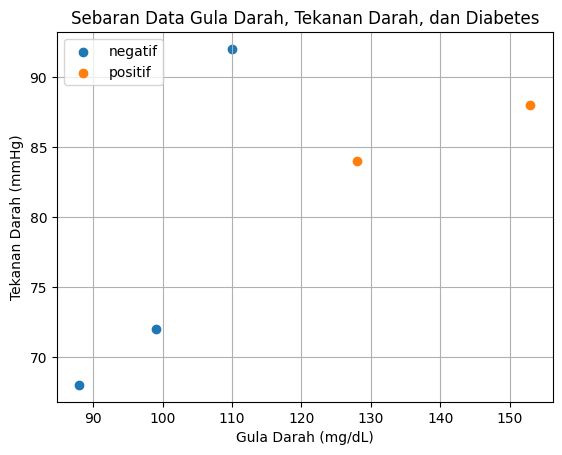

In [55]:
#Visualisasi Data

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for diabetes, d in sensus_df.groupby('diabetes'):
    ax.scatter(d['gula darah'], d['tekanan darah'], label=diabetes)

plt.legend(loc='upper left')
plt.title('Sebaran Data Gula Darah, Tekanan Darah, dan Diabetes')
plt.xlabel('Gula Darah (mg/dL)')
plt.ylabel('Tekanan Darah (mmHg)')
plt.grid(True)
plt.show()


In [66]:
#Preprocessing Dataset

import numpy as np

X_train = np.array(sensus_df[['Gula Darah', 'Tekanan Darah']])
y_train = np.array(sensus_df['Diabetes'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

X_train:
[[ 99  72]
 [110  92]
 [153  88]
 [128  84]
 [ 88  68]]

y_train: ['negatif' 'negatif' 'positif' 'positif' 'negatif']


In [74]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train:\n{y_train}')

y_train:
[[0]
 [0]
 [1]
 [1]
 [0]]


In [75]:

y_train = y_train.flatten()
print(f'y_train: {y_train}')

y_train: [0 0 1 1 0]


In [77]:
#Training KNN Clasification Mode

from sklearn.neighbors import KNeighborsClassifier

K = 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [78]:
#Prediksi Penyakit Diabetes
gula_darah = 99
tekanan_darah = 72
X_new = np.array([gula_darah, tekanan_darah]).reshape(1, -1)
X_new

array([[99, 72]])

In [79]:

y_new = model.predict(X_new)
y_new

array([0])

In [81]:
lb.inverse_transform(y_new)

array(['negatif'], dtype='<U7')

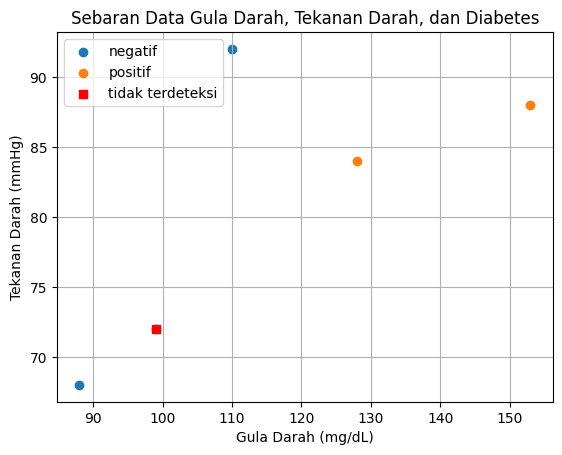

In [86]:
#Visualisasi Nearest Neighbours

fig, ax = plt.subplots()
for Diabetes, d in sensus_df.groupby('Diabetes'):
    ax.scatter(d['Gula Darah'], d['Tekanan Darah'], label=Diabetes)

plt.scatter(gula_darah,
            tekanan_darah,
            marker='s',
            color='red',
            label='tidak terdeteksi')

plt.legend(loc='upper left')
plt.title('Sebaran Data Gula Darah, Tekanan Darah, dan Diabetes')
plt.xlabel('Gula Darah (mg/dL)')
plt.ylabel('Tekanan Darah (mmHg)')
plt.grid(True)
plt.show()

In [95]:
tidak_terdeteksi = np.array([gula_darah, tekanan_darah])
tidak_terdeteksi

array([99, 72])

In [96]:

X_train

array([[ 99,  72],
       [110,  92],
       [153,  88],
       [128,  84],
       [ 88,  68]], dtype=int64)

In [97]:
from scipy.spatial.distance import euclidean

data_jarak = [euclidean(tidak_terdeteksi, d) for d in X_train]
data_jarak

[0.0,
 22.825424421026653,
 56.32051136131489,
 31.38470965295043,
 11.704699910719626]

In [99]:
sensus_df['jarak'] = data_jarak
sensus_df.sort_values(['jarak'])

,Gula Darah,Tekanan Darah,Diabetes,jarak
0,99,72,negatif,0.000000
4,88,68,negatif,11.704700
1,110,92,negatif,22.825424
3,128,84,positif,31.384710
2,153,88,positif,56.320511


In [104]:
#Testing Set

X_test = np.array([[156, 92], [99, 70], [109, 60], [120, 80]])
y_test = lb.transform(np.array(['positif', 'negatif', 'negatif', 'positif'])).flatten()

print(f'X_test:\n{X_test}\n')
print(f'y_test:\n{y_test}')


X_test:
[[156  92]
 [ 99  70]
 [109  60]
 [120  80]]

y_test:
[1 0 0 1]


In [105]:
#Prediksi terhadap testing set


y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0])

In [106]:
#Accuracy

from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print(f'Accuracy: {acc}')

Accuracy: 0.75


In [107]:
#Precission

from sklearn.metrics import precision_score

prec = precision_score(y_test, y_pred)

print(f'Precission: {prec}')

Precission: 1.0


In [108]:
#Recall

from sklearn.metrics import recall_score

rec = recall_score(y_test, y_pred)

print(f'Recall: {rec}')

Recall: 0.5


In [109]:
#F1 Score

from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)

print(f'F1-score: {f1}')

F1-score: 0.6666666666666666


In [110]:
#Classification Report

from sklearn.metrics import classification_report

cls_report = classification_report(y_test, y_pred)

print(f'Classification Report:\n{cls_report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



In [112]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)

print(f'MCC: {mcc}')

MCC: 0.5773502691896258
